# Ratial plots for the sample cluster

In [1]:
from pylab import *
import matplotlib
%matplotlib inline

path="/home/wcui/Work/Data/Box_1024_410_Trieste/"
GC=4.301*1.0e4 ##km2 kpc (10*10 Msun-1) s-2

# dm_0=np.loadtxt(path+"RDM/data/KP_sin-al-0.txt")
# dm_1=np.loadtxt(path+"RDM/data/KP_sin-al-6.txt")
# dm_9=np.loadtxt(path+"RDM/data/KP_sin-al-9.txt")
# cs_0=np.loadtxt(path+"CSF/data/KP_sin-al-0.txt")
# cs_1=np.loadtxt(path+"CSF/data/KP_sin-al-6.txt")
# cs_9=np.loadtxt(path+"CSF/data/KP_sin-al-9.txt")
# ag_0=np.loadtxt(path+"AGN/data/KP_sin-al-0.txt")
# ag_1=np.loadtxt(path+"AGN/data/KP_sin-al-6.txt")
# ag_9=np.loadtxt(path+"AGN/data/KP_sin-al-9.txt")
# sigma-t = np.sqrt(GC*M/R)

rdm=np.load("../RDM/radial-data.npy")
csf=np.load("../CSF/radial-data.npy")
agn=np.load("../AGN/radial-data.npy")

eta_dm=(rdm[:,:,10]-rdm[:,:,18])/np.abs(rdm[:,:,14])
eta_odm=(rdm[:,:,11]-rdm[:,:,20])/np.abs(rdm[:,:,15]) #mistake in DM Es
zeta_dm=rdm[:,:,26]/np.sqrt(GC*rdm[:,:,6]/rdm[:,:,0]); zeta_odm=rdm[:,:,27]/np.sqrt(GC*rdm[:,:,7]/rdm[:,:,0])
delta_dm=rdm[:,:,2];                                   delta_odm=rdm[:,:,3]
fs_dm=rdm[:,:,22]/rdm[:,:,6];                          fs_odm=rdm[:,:,23]/rdm[:,:,7]

eta_cs =(csf[:,:,10]+csf[:,:,1]-csf[:,:,18])/np.abs(csf[:,:,14])#add gas thermal energy
eta_ocs=(csf[:,:,11]-csf[:,:,19])/np.abs(csf[:,:,15])
zeta_cs=csf[:,:,26]/np.sqrt(GC*csf[:,:,6]/csf[:,:,0]); zeta_ocs=csf[:,:,27]/np.sqrt(GC*csf[:,:,7]/csf[:,:,0])
delta_cs=csf[:,:,2];                                   delta_ocs=csf[:,:,3]
fs_cs=csf[:,:,22]/csf[:,:,6];                          fs_ocs=csf[:,:,23]/csf[:,:,7]

eta_ag =(agn[:,:,10]+agn[:,:,1]-agn[:,:,18])/np.abs(agn[:,:,14])#add gas thermal energy
eta_oag=(agn[:,:,11]-agn[:,:,19])/np.abs(agn[:,:,15])
zeta_ag=agn[:,:,26]/np.sqrt(GC*agn[:,:,6]/agn[:,:,0]); zeta_oag=agn[:,:,27]/np.sqrt(GC*agn[:,:,7]/agn[:,:,0])
delta_ag=agn[:,:,2];                                   delta_oag=agn[:,:,3]
fs_ag=agn[:,:,22]/agn[:,:,6];                          fs_oag=agn[:,:,23]/agn[:,:,7]

M_dm=np.log10(rdm[:,:,6]*1.0e10); M_cs=np.log10(csf[:,:,6]*1.0e10); M_ag=np.log10(agn[:,:,6]*1.0e10);

In [100]:
print(np.abs(eta_dm[:,-1]-1).min(),eta_dm[:,-1].min(),eta_dm[:,-1].max())
print(np.abs(eta_dm[:,-1]-1).argmin(),eta_dm[:,-1].argmin(),eta_dm[:,-1].argmax())
print(eta_cs[55,-1],eta_cs[19,-1],eta_cs[14,-1])
print(eta_ag[55,-1],eta_ag[19,-1],eta_ag[14,-1])
idin=np.where(np.abs(eta_dm[:,-1]-1)<0.01)[0]
print(idin,delta_dm[idin,-1],fs_dm[idin,-1])
print(np.where((eta_dm[:,-1]>=1.2)&(delta_dm[:,-1]<0.01)))
print(np.where((eta_dm[:,-1]>=1.2)&(fs_dm[:,-1]<0.04)))

0.000870228 0.782565 1.33147
55 19 14
0.920715 0.791937 1.22772
0.899799 0.723211 1.23665
[ 0 22 44 55 60 75 78 82 89 97] [ 0.03733952  0.04708078  0.00605037  0.01723845  0.08592832  0.02956838
  0.04531914  0.05366765  0.06989015  0.07847504] [ 0.03150661  0.06105099  0.04676186  0.06885729  0.04762367  0.06770309
  0.02210457  0.02534113  0.01712899  0.06793655]
(array([8]),)
(array([ 8, 12]),)


###### ratial changes of selection criteria for relaxed and un-relaxed clusters

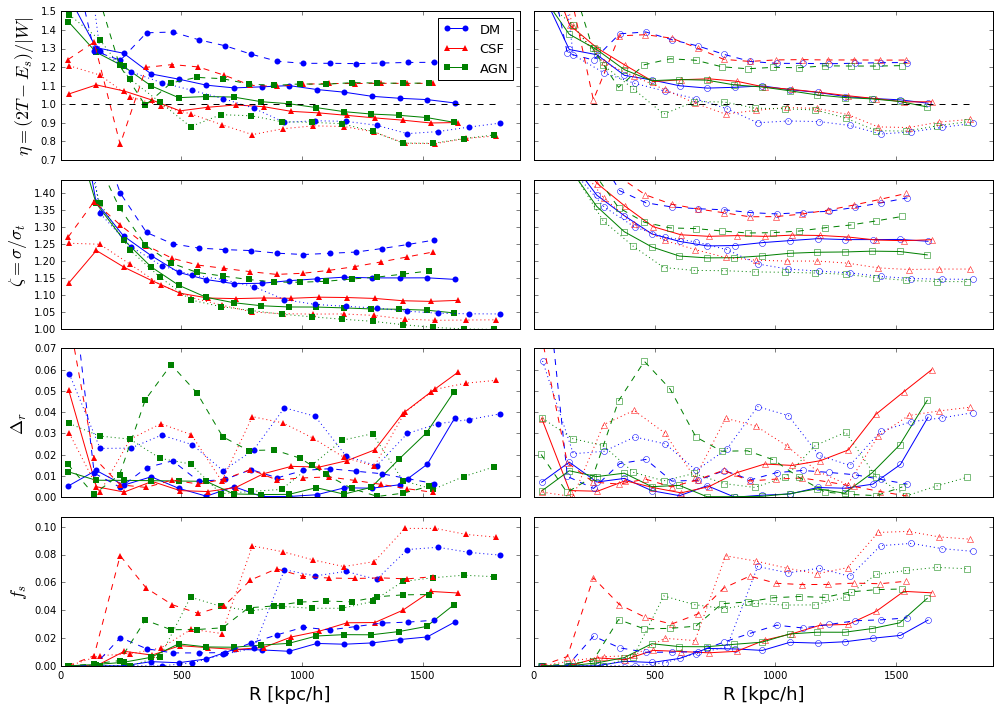

In [88]:
f4,axes=subplots(4, 2,sharex='all',sharey='row')
f4.set(figwidth=14,figheight=10)
for i in [0,6,8]:
    if i == 0:
        #dm_s=dm_0; cs_s=cs_0; ag_s=ag_0
        lss='-'
    elif i == 6:
        #dm_s=dm_1; cs_s=cs_1; ag_s=ag_1
        lss=':'
    elif i == 8:
        #dm_s=dm_9; cs_s=cs_9; ag_s=ag_9
        lss='--'

    if i == 0:
        axes[0,0].plot(rdm[i,:,0],eta_dm[i,:], c='b',marker='o',mec='none',mfc='b',ls=lss,label="DM") #\eta
        axes[0,1].plot(rdm[i,:,0],eta_odm[i,:],c='b',marker='o',mec='b',mfc='none',ls=lss,label="DM") #\eta
        axes[0,0].plot(csf[i,:,0],eta_cs[i,:], c='r',marker='^',mec='none',mfc='r',ls=lss,label="CSF") #\eta
        axes[0,1].plot(csf[i,:,0],eta_ocs[i,:],c='r',marker='^',mec='r',mfc='none',ls=lss,label="CSF") #\eta
        axes[0,0].plot(agn[i,:,0],eta_ag[i,:], c='g',marker='s',mec='none',mfc='g',ls=lss,label="AGN") #\eta
        axes[0,1].plot(agn[i,:,0],eta_oag[i,:],c='g',marker='s',mec='g',mfc='none',ls=lss,label="AGN") #\eta
    else:
        axes[0,0].plot(rdm[i,:,0],eta_dm[i,:], c='b',marker='o',mec='none',mfc='b',ls=lss) #\eta
        axes[0,1].plot(rdm[i,:,0],eta_odm[i,:],c='b',marker='o',mec='b',mfc='none',ls=lss) #\eta
        axes[0,0].plot(csf[i,:,0],eta_cs[i,:], c='r',marker='^',mec='none',mfc='r',ls=lss) #\eta
        axes[0,1].plot(csf[i,:,0],eta_ocs[i,:],c='r',marker='^',mec='r',mfc='none',ls=lss) #\eta
        axes[0,0].plot(agn[i,:,0],eta_ag[i,:], c='g',marker='s',mec='none',mfc='g',ls=lss) #\eta
        axes[0,1].plot(agn[i,:,0],eta_oag[i,:],c='g',marker='s',mec='g',mfc='none',ls=lss) #\eta            
    
    axes[1,0].plot(rdm[i,:,0],zeta_dm[i,:], c='b',marker='o',mec='none',mfc='b',ls=lss,label="DM") #\zeta
    axes[1,1].plot(rdm[i,:,0],zeta_odm[i,:],c='b',marker='o',mec='b',mfc='none',ls=lss,label="DM") #\zeta
    axes[1,0].plot(csf[i,:,0],zeta_cs[i,:], c='r',marker='^',mec='none',mfc='r',ls=lss,label="CSF") #\zeta
    axes[1,1].plot(csf[i,:,0],zeta_ocs[i,:],c='r',marker='^',mec='r',mfc='none',ls=lss,label="CSF") #\zeta
    axes[1,0].plot(agn[i,:,0],zeta_ag[i,:], c='g',marker='s',mec='none',mfc='g',ls=lss,label="AGN") #\zeta
    axes[1,1].plot(agn[i,:,0],zeta_oag[i,:],c='g',marker='s',mec='g',mfc='none',ls=lss,label="AGN") #\zeta
    
    axes[2,0].plot(rdm[i,:,0],delta_dm[i,:], c='b',marker='o',mec='none',mfc='b',ls=lss,label="DM") #\eta
    axes[2,1].plot(rdm[i,:,0],delta_odm[i,:],c='b',marker='o',mec='b',mfc='none',ls=lss,label="DM") #\eta
    axes[2,0].plot(csf[i,:,0],delta_cs[i,:], c='r',marker='^',mec='none',mfc='r',ls=lss,label="CSF") #\eta
    axes[2,1].plot(csf[i,:,0],delta_ocs[i,:],c='r',marker='^',mec='r',mfc='none',ls=lss,label="CSF") #\eta
    axes[2,0].plot(agn[i,:,0],delta_ag[i,:], c='g',marker='s',mec='none',mfc='g',ls=lss,label="AGN") #\eta
    axes[2,1].plot(agn[i,:,0],delta_oag[i,:],c='g',marker='s',mec='g',mfc='none',ls=lss,label="AGN") #\eta
    
    axes[3,0].plot(rdm[i,:,0],fs_dm[i,:], c='b',marker='o',mec='none',mfc='b',ls=lss,label="DM") #\eta
    axes[3,1].plot(rdm[i,:,0],fs_odm[i,:],c='b',marker='o',mec='b',mfc='none',ls=lss,label="DM") #\eta
    axes[3,0].plot(csf[i,:,0],fs_cs[i,:], c='r',marker='^',mec='none',mfc='r',ls=lss,label="CSF") #\eta
    axes[3,1].plot(csf[i,:,0],fs_ocs[i,:],c='r',marker='^',mec='r',mfc='none',ls=lss,label="CSF") #\eta
    axes[3,0].plot(agn[i,:,0],fs_ag[i,:], c='g',marker='s',mec='none',mfc='g',ls=lss,label="AGN") #\eta
    axes[3,1].plot(agn[i,:,0],fs_oag[i,:],c='g',marker='s',mec='g',mfc='none',ls=lss,label="AGN") #\eta
    
#     ax1.plot(cs_s[:,1],(cs_s[:,2]+cs_s[:,3]-cs_s[:,5]-cs_s[:,6])/-cs_s[:,4],'r',ls=lss,label="CSF")
#     ax1.plot(ag_s[:,1],(ag_s[:,2]+ag_s[:,3]-ag_s[:,5]-ag_s[:,6])/-ag_s[:,4],'g',ls=lss,label="AGN")
#     ax2.plot(dm_s[:,1],dm_s[:,-3]/dm_s[:,1],'b',ls=lss,label="DM") #\Delta_r
#     ax2.plot(cs_s[:,1],cs_s[:,-3]/cs_s[:,1],'r',ls=lss,label="CSF")
#     ax2.plot(ag_s[:,1],ag_s[:,-3]/ag_s[:,1],'g',ls=lss,label="AGN")
#     ax3.plot(dm_s[:,1],dm_s[:,-2],'b',ls=lss,label="DM") #fs
#     ax3.plot(cs_s[:,1],cs_s[:,-2],'r',ls=lss,label="CSF")
#     ax3.plot(ag_s[:,1],ag_s[:,-2],'g',ls=lss,label="AGN")

##[ax.set_ylim(0.7,1.75) for ax in [ax11,ax21]]
[ax.plot(rdm[6,:,0],np.ones(rdm[6,:,0].size),'k--') for ax in axes.reshape(8)[:4]]
# ax1.plot([dm_s[0,1], dm_s[-1,1]], [1,1], 'k--')
axes[0,0].set_ylim(0.7,1.5)
axes[1,0].set_ylim(1.0,1.44)
axes[2,0].set_ylim(.0,0.07)
axes[3,0].set_ylim(.0,0.107)
axes[3,0].set_xlim(.0,1900)


axes[0,0].legend(loc=1,fontsize=13)
axes[0,0].set_ylabel(r"$\eta = (2T - E_s) / |W|$",fontsize=18)
axes[1,0].set_ylabel(r"$\zeta = \sigma / \sigma_t$",fontsize=18)
axes[2,0].set_ylabel(r"$\Delta_r$",fontsize=18)
axes[3,0].set_ylabel(r"$f_s$",fontsize=18)
axes[3,0].set_xlabel("R [kpc/h]",fontsize=18)
axes[3,1].set_xlabel("R [kpc/h]",fontsize=18)
f4.tight_layout()
f4.savefig('./plots/radial-profile.eps',dpi=250)

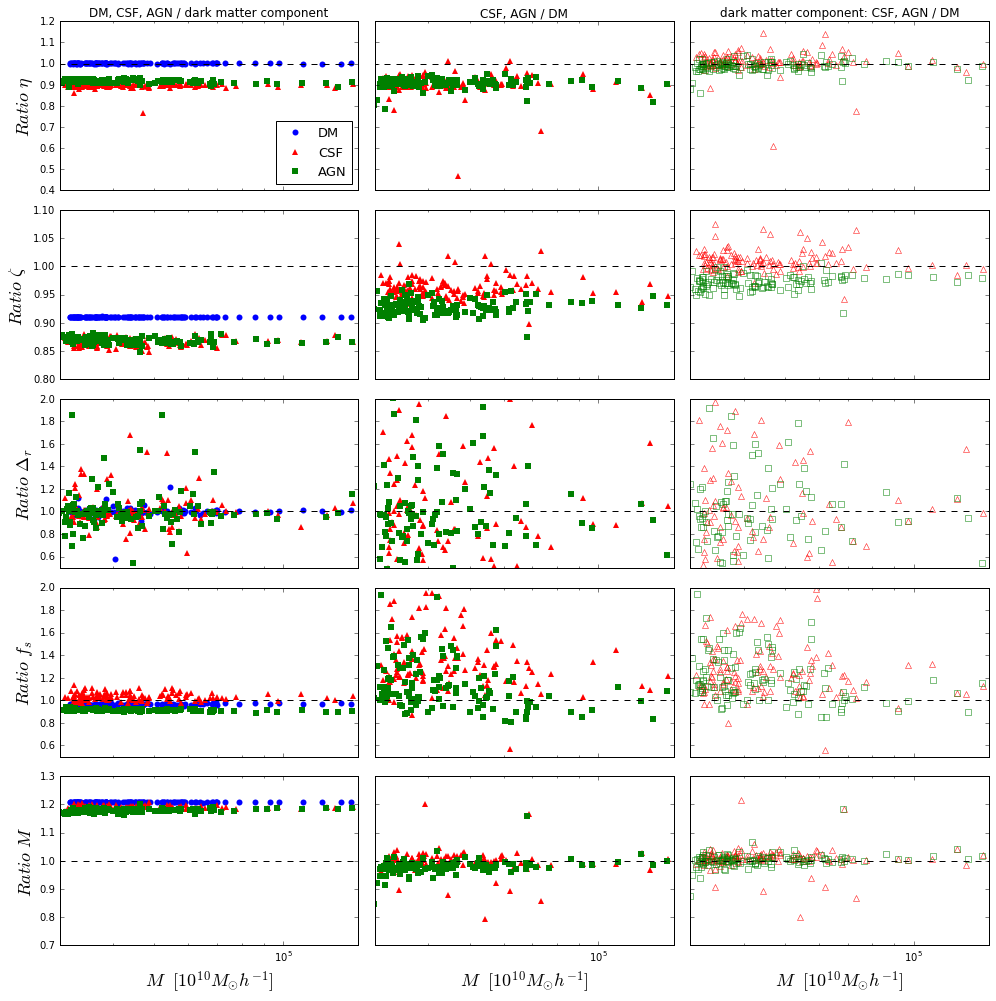

In [7]:
f5,axes=subplots(5, 3,sharex='all',sharey='row')
f5.set(figwidth=14,figheight=14)
# for i in [0,6,8]:
#     if i == 0:
#         #dm_s=dm_0; cs_s=cs_0; ag_s=ag_0
#         lss='-'
#     elif i == 6:
#         #dm_s=dm_1; cs_s=cs_1; ag_s=ag_1
#         lss=':'
#     elif i == 8:
#         #dm_s=dm_9; cs_s=cs_9; ag_s=ag_9
#         lss='--'

#     if i == 0:
axes[0,0].plot(rdm[:,-1,6],eta_dm[:,-1]/eta_odm[:,-1], ls='none',marker='o',mec='none',mfc='b',label="DM") #\eta
axes[0,0].plot(csf[:,-1,6],eta_cs[:,-1]/eta_ocs[:,-1], ls='none',marker='^',mec='none',mfc='r',label="CSF") #\eta
axes[0,0].plot(agn[:,-1,6],eta_ag[:,-1]/eta_oag[:,-1], ls='none',marker='s',mec='none',mfc='g',label="AGN") #\eta
axes[0,1].plot(csf[:,-1,6],eta_cs[:,-1]/eta_dm[:,-1], ls='none',marker='^',mec='none',mfc='r',label="CSF") #\eta
axes[0,1].plot(agn[:,-1,6],eta_ag[:,-1]/eta_dm[:,-1], ls='none',marker='s',mec='none',mfc='g',label="AGN") #\eta
axes[0,2].plot(csf[:,-1,6],eta_ocs[:,-1]/eta_odm[:,-1], ls='none',marker='^',mec='r',mfc='none',label="CSF") #\eta
axes[0,2].plot(agn[:,-1,6],eta_oag[:,-1]/eta_odm[:,-1], ls='none',marker='s',mec='g',mfc='none',label="AGN") #\eta
#     else:
# axes[0,0].plot(rdm[i,:,0],eta_dm[i,:], c='b',marker='o',mec='none',mfc='b',ls=lss) #\eta
# axes[0,0].plot(csf[i,:,0],eta_cs[i,:], c='r',marker='^',mec='none',mfc='r',ls=lss) #\eta
# axes[0,0].plot(agn[i,:,0],eta_ag[i,:], c='g',marker='s',mec='none',mfc='g',ls=lss) #\eta

axes[1,0].plot(rdm[:,-1,6],zeta_dm[:,-1]/zeta_odm[:,-1], ls='none',marker='o',mec='none',mfc='b',label="DM") #\zeta
axes[1,0].plot(csf[:,-1,6],zeta_cs[:,-1]/zeta_ocs[:,-1], ls='none',marker='^',mec='none',mfc='r',label="CSF") #\zeta
axes[1,0].plot(agn[:,-1,6],zeta_ag[:,-1]/zeta_oag[:,-1], ls='none',marker='s',mec='none',mfc='g',label="AGN") #\zeta
axes[1,1].plot(csf[:,-1,6],zeta_cs[:,-1]/zeta_dm[:,-1], ls='none',marker='^',mec='none',mfc='r',label="CSF") #\zeta
axes[1,1].plot(agn[:,-1,6],zeta_ag[:,-1]/zeta_dm[:,-1], ls='none',marker='s',mec='none',mfc='g',label="AGN") #\zeta
axes[1,2].plot(csf[:,-1,6],zeta_ocs[:,-1]/zeta_odm[:,-1], ls='none',marker='^',mec='r',mfc='none',label="CSF") #\zeta
axes[1,2].plot(agn[:,-1,6],zeta_oag[:,-1]/zeta_odm[:,-1], ls='none',marker='s',mec='g',mfc='none',label="AGN") #\zeta

axes[2,0].plot(rdm[:,-1,6],delta_dm[:,-1]/delta_odm[:,-1], ls='none',marker='o',mec='none',mfc='b',label="DM") #\eta
axes[2,0].plot(csf[:,-1,6],delta_cs[:,-1]/delta_ocs[:,-1], ls='none',marker='^',mec='none',mfc='r',label="CSF") #\eta
axes[2,0].plot(agn[:,-1,6],delta_ag[:,-1]/delta_oag[:,-1], ls='none',marker='s',mec='none',mfc='g',label="AGN") #\eta
axes[2,1].plot(csf[:,-1,6],delta_cs[:,-1]/delta_dm[:,-1], ls='none',marker='^',mec='none',mfc='r',label="CSF") #\eta
axes[2,1].plot(agn[:,-1,6],delta_ag[:,-1]/delta_dm[:,-1], ls='none',marker='s',mec='none',mfc='g',label="AGN") #\eta
axes[2,2].plot(csf[:,-1,6],delta_ocs[:,-1]/delta_odm[:,-1], ls='none',marker='^',mec='r',mfc='none',label="CSF") #\eta
axes[2,2].plot(agn[:,-1,6],delta_oag[:,-1]/delta_odm[:,-1], ls='none',marker='s',mec='g',mfc='none',label="AGN") #\eta

axes[3,0].plot(rdm[:,-1,6],fs_dm[:,-1]/fs_odm[:,-1], ls='none',marker='o',mec='none',mfc='b',label="DM") #\eta
axes[3,0].plot(csf[:,-1,6],fs_cs[:,-1]/fs_ocs[:,-1], ls='none',marker='^',mec='none',mfc='r',label="CSF") #\eta
axes[3,0].plot(agn[:,-1,6],fs_ag[:,-1]/fs_oag[:,-1], ls='none',marker='s',mec='none',mfc='g',label="AGN") #\eta
axes[3,1].plot(csf[:,-1,6],fs_cs[:,-1]/fs_dm[:,-1], ls='none',marker='^',mec='none',mfc='r',label="CSF") #\eta
axes[3,1].plot(agn[:,-1,6],fs_ag[:,-1]/fs_dm[:,-1], ls='none',marker='s',mec='none',mfc='g',label="AGN") #\eta
axes[3,2].plot(csf[:,-1,6],fs_ocs[:,-1]/fs_odm[:,-1], ls='none',marker='^',mec='r',mfc='none',label="CSF") #\eta
axes[3,2].plot(agn[:,-1,6],fs_oag[:,-1]/fs_odm[:,-1], ls='none',marker='s',mec='g',mfc='none',label="AGN") #\eta

axes[4,0].plot(rdm[:,-1,6],rdm[:,-1,6]/rdm[:,-1,7], ls='none',marker='o',mec='none',mfc='b',label="DM") #\eta
axes[4,0].plot(csf[:,-1,6],csf[:,-1,6]/csf[:,-1,7], ls='none',marker='^',mec='none',mfc='r',label="CSF") #\eta
axes[4,0].plot(agn[:,-1,6],agn[:,-1,6]/agn[:,-1,7], ls='none',marker='s',mec='none',mfc='g',label="AGN") #\eta
axes[4,1].plot(csf[:,-1,6],csf[:,-1,6]/rdm[:,-1,6], ls='none',marker='^',mec='none',mfc='r',label="CSF") #\eta
axes[4,1].plot(agn[:,-1,6],agn[:,-1,6]/rdm[:,-1,6], ls='none',marker='s',mec='none',mfc='g',label="AGN") #\eta
axes[4,2].plot(csf[:,-1,6],csf[:,-1,7]/rdm[:,-1,7], ls='none',marker='^',mec='r',mfc='none',label="CSF") #\eta
axes[4,2].plot(agn[:,-1,6],agn[:,-1,7]/rdm[:,-1,7], ls='none',marker='s',mec='g',mfc='none',label="AGN") #\eta
#     ax1.plot(cs_s[:,1],(cs_s[:,2]+cs_s[:,3]-cs_s[:,5]-cs_s[:,6])/-cs_s[:,4],'r',ls=lss,label="CSF")
#     ax1.plot(ag_s[:,1],(ag_s[:,2]+ag_s[:,3]-ag_s[:,5]-ag_s[:,6])/-ag_s[:,4],'g',ls=lss,label="AGN")
#     ax2.plot(dm_s[:,1],dm_s[:,-3]/dm_s[:,1],'b',ls=lss,label="DM") #\Delta_r
#     ax2.plot(cs_s[:,1],cs_s[:,-3]/cs_s[:,1],'r',ls=lss,label="CSF")
#     ax2.plot(ag_s[:,1],ag_s[:,-3]/ag_s[:,1],'g',ls=lss,label="AGN")
#     ax3.plot(dm_s[:,1],dm_s[:,-2],'b',ls=lss,label="DM") #fs
#     ax3.plot(cs_s[:,1],cs_s[:,-2],'r',ls=lss,label="CSF")
#     ax3.plot(ag_s[:,1],ag_s[:,-2],'g',ls=lss,label="AGN")

##[ax.set_ylim(0.7,1.75) for ax in [ax11,ax21]]
[ax.plot(ax.get_xlim(),[1,1],'k--') for ax in axes.reshape(15)]
# # ax1.plot([dm_s[0,1], dm_s[-1,1]], [1,1], 'k--')
# axes[0,0].set_ylim(0.7,1.5)
# axes[1,0].set_ylim(1.02,1.44)
axes[2,0].set_ylim(.5,2.)
axes[3,0].set_ylim(.5,2.)
axes[3,0].set_xlim(30000,150000)

l=axes[0,0].legend(loc=4,fontsize=13,numpoints=1)
l.set_zorder(-2)
axes[0,0].set_title("DM, CSF, AGN / dark matter component")
axes[0,1].set_title("CSF, AGN / DM")
axes[0,2].set_title("dark matter component: CSF, AGN / DM")
axes[0,0].set_xscale('log')
axes[0,0].set_ylabel(r"$Ratio \ {\eta}$",fontsize=18)
axes[1,0].set_ylabel(r"$Ratio \ {\zeta}$",fontsize=18)
axes[2,0].set_ylabel(r"$Ratio \ {\Delta_r}$",fontsize=18)
axes[3,0].set_ylabel(r"$Ratio \ {f_s}$",fontsize=18)
axes[4,0].set_ylabel(r"$Ratio \ M$",fontsize=18)
axes[4,0].set_xlabel(r"$M \ \ [10^{10} M_{\odot} h^{-1}]$",fontsize=18)
axes[4,1].set_xlabel(r"$M \ \ [10^{10} M_{\odot} h^{-1}]$",fontsize=18)
axes[4,2].set_xlabel(r"$M \ \ [10^{10} M_{\odot} h^{-1}]$",fontsize=18)
#axes[3].set_xlabel("R [kpc/h]",fontsize=18)
f5.tight_layout()
f5.savefig('./plots/BE.eps',dpi=250)

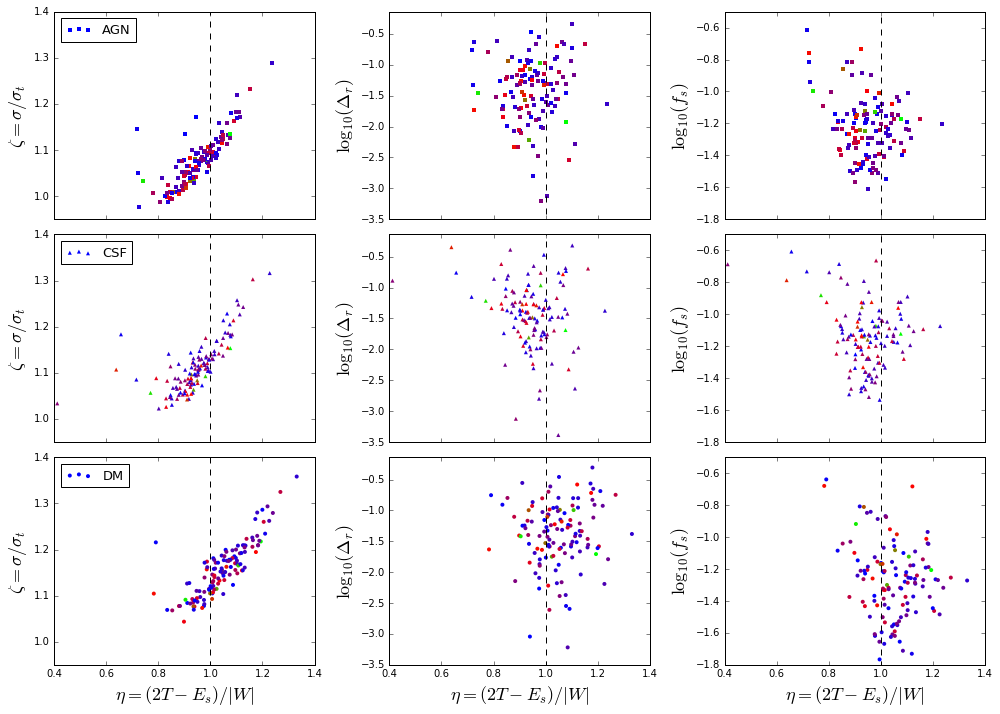

In [95]:
f6,axes=subplots(3, 3,sharex='all',sharey='col')
f6.set(figwidth=14,figheight=10)

axes[2,0].scatter(eta_dm[:,-1], zeta_dm[:,-1],s=16,c=M_dm[:,-1],cmap='brg', marker='o',edgecolor='none',label="DM")
axes[1,0].scatter(eta_cs[:,-1], zeta_cs[:,-1],s=16,c=M_cs[:,-1],cmap='brg', marker='^',edgecolor='none',label="CSF")
axes[0,0].scatter(eta_ag[:,-1], zeta_ag[:,-1],s=16,c=M_ag[:,-1],cmap='brg', marker='s',edgecolor='none',label="AGN")

axes[2,1].scatter(eta_dm[:,-1], np.log10(delta_dm[:,-1]),s=16,c=M_dm[:,-1],cmap='brg', marker='o',edgecolor='none',label="DM")
axes[1,1].scatter(eta_cs[:,-1], np.log10(delta_cs[:,-1]),s=16,c=M_cs[:,-1],cmap='brg', marker='^',edgecolor='none',label="CSF")
axes[0,1].scatter(eta_ag[:,-1], np.log10(delta_ag[:,-1]),s=16,c=M_ag[:,-1],cmap='brg', marker='s',edgecolor='none',label="AGN")

axes[2,2].scatter(eta_dm[:,-1], np.log10(fs_dm[:,-1]),s=16,c=M_dm[:,-1],cmap='brg', marker='o',edgecolor='none',label="DM")
axes[1,2].scatter(eta_cs[:,-1], np.log10(fs_cs[:,-1]),s=16,c=M_cs[:,-1],cmap='brg', marker='^',edgecolor='none',label="CSF")
axes[0,2].scatter(eta_ag[:,-1], np.log10(fs_ag[:,-1]),s=16,c=M_ag[:,-1],cmap='brg', marker='s',edgecolor='none',label="AGN")

##[ax.set_ylim(0.7,1.75) for ax in [ax11,ax21]]
[ax.plot([1,1],ax.get_ylim(),'k--') for ax in axes.reshape(9)]

axes[0,0].set_ylim(0.95,1.4)
axes[0,1].set_ylim(-3.5,-0.14)
axes[0,2].set_ylim(-1.80,-0.5)
# axes[3,0].set_ylim(.0,0.107)
axes[2,0].set_xlim(.40,1.4)

axes[0,0].legend(loc=2,fontsize=13,numpoints=1)
axes[1,0].legend(loc=2,fontsize=13,numpoints=1)
axes[2,0].legend(loc=2,fontsize=13,numpoints=1)
# axes[0,0].set_ylabel(r"$\eta = (2T - E_s) / |W|$",fontsize=18)
axes[0,0].set_ylabel(r"$\zeta = \sigma / \sigma_t$",fontsize=18)
axes[1,0].set_ylabel(r"$\zeta = \sigma / \sigma_t$",fontsize=18)
axes[2,0].set_ylabel(r"$\zeta = \sigma / \sigma_t$",fontsize=18)
axes[0,1].set_ylabel(r"$\log_{10}(\Delta_r)$",fontsize=18)
axes[1,1].set_ylabel(r"$\log_{10}(\Delta_r)$",fontsize=18)
axes[2,1].set_ylabel(r"$\log_{10}(\Delta_r)$",fontsize=18)
axes[0,2].set_ylabel(r"$\log_{10}(f_s)$",fontsize=18)
axes[1,2].set_ylabel(r"$\log_{10}(f_s)$",fontsize=18)
axes[2,2].set_ylabel(r"$\log_{10}(f_s)$",fontsize=18)
axes[2,0].set_xlabel(r"$\eta = (2T - E_s) / |W|$",fontsize=18)
axes[2,1].set_xlabel(r"$\eta = (2T - E_s) / |W|$",fontsize=18)
axes[2,2].set_xlabel(r"$\eta = (2T - E_s) / |W|$",fontsize=18)
f6.tight_layout()
f6.savefig('./plots/relations.eps',dpi=250)

###### velocity dispersion 3D profile for all materials 
lower panel show the difference to the theoretical prediction with \sigma_t = np.sqrt(GM/R)

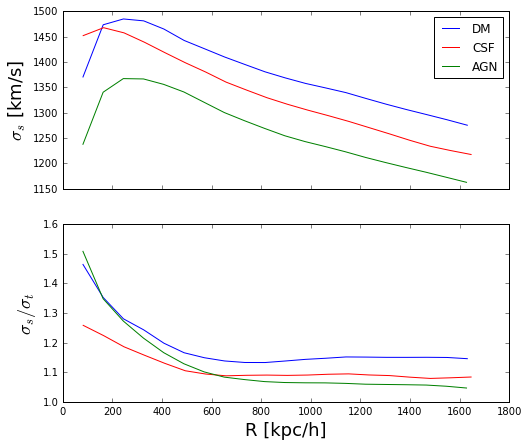

In [2]:
#First plot the radial changes of sigma 3D 
f1,(ax1, ax2)=subplots(2, 1,sharex='all')
f1.set(figwidth=8,figheight=7)
ax1.plot(dm_s[:,1],dm_s[:,-1],'b-',label="DM")
ax1.plot(cs_s[:,1],cs_s[:,-1],'r-',label="CSF")
ax1.plot(ag_s[:,1],ag_s[:,-1],'g-',label="AGN")
ax2.plot(dm_s[:,1],dm_s[:,-1]/np.sqrt(GC*dm_s[:,0]/dm_s[:,1]),'b-')
ax2.plot(cs_s[:,1],cs_s[:,-1]/np.sqrt(GC*cs_s[:,0]/cs_s[:,1]),'r-')
ax2.plot(ag_s[:,1],ag_s[:,-1]/np.sqrt(GC*ag_s[:,0]/ag_s[:,1]),'g-')
ax2.plot([0,1700],[1,1],'k--')
ax1.set_ylabel(r"$\sigma_s$ [km/s]",fontsize=18)
ax1.legend(loc=1,fontsize=12)
ax2.set_ylabel(r"$\sigma_s / \sigma_t$",fontsize=18)
ax2.set_xlabel("R [kpc/h]",fontsize=18)

###### Ratial plot for potential energy, kit energy, surface pressure

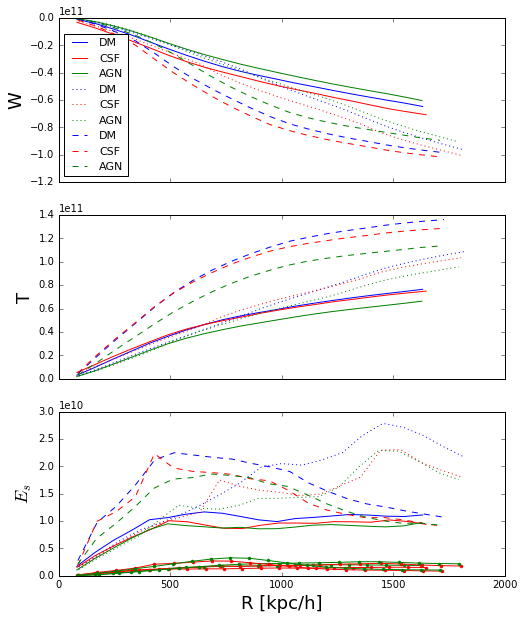

In [11]:
#Second plot the radial changes of pot, kit, surface pressure
f2,(ax1, ax2, ax3)=subplots(3, 1,sharex='all')
f2.set(figwidth=8,figheight=10)
for i in range(3):
    if i == 0:
        dm_s=dm_0; cs_s=cs_0; ag_s=ag_0
        lss='-'
    elif i == 1:
        dm_s=dm_1; cs_s=cs_1; ag_s=ag_1
        lss=':'
    elif i == 2:
        dm_s=dm_9; cs_s=cs_9; ag_s=ag_9
        lss='--'
    ax1.plot(dm_s[:,1],dm_s[:,3],'b',ls=lss,label="DM") #POT
    ax1.plot(cs_s[:,1],cs_s[:,4],'r',ls=lss,label="CSF")
    ax1.plot(ag_s[:,1],ag_s[:,4],'g',ls=lss,label="AGN")
    ax2.plot(dm_s[:,1],dm_s[:,2],'b',ls=lss,label="DM") #KIT
    ax2.plot(cs_s[:,1],cs_s[:,2]+cs_s[:,3],'r',ls=lss,label="CSF")
    ax2.plot(ag_s[:,1],ag_s[:,2]+ag_s[:,3],'g',ls=lss,label="AGN")
    ax3.plot(dm_s[:,1],dm_s[:,4],'b',ls=lss,label="DM") #SP
    ax3.plot(cs_s[:,1],cs_s[:,5],'r',ls=lss,label="CSF")
    ax3.plot(ag_s[:,1],ag_s[:,5],'g',ls=lss,label="AGN")
    ax3.plot(cs_s[:,1],cs_s[:,6],'r.-',label="CSF")
    ax3.plot(ag_s[:,1],ag_s[:,6],'g.-',label="AGN")
ax1.set_ylabel("W",fontsize=18)
ax1.legend(loc=3,fontsize=11)
ax2.set_ylabel("T",fontsize=18)
ax3.set_ylabel(r"$E_s$",fontsize=18)
ax3.set_xlabel("R [kpc/h]",fontsize=18)

In [24]:
#For DM part only! B effects on the DM 
dm_d0=np.loadtxt(path+"RDM/data/KP_sin-dm-0.txt")
cs_d0=np.loadtxt(path+"CSF/data/KP_sin-dm-0.txt")
ag_d0=np.loadtxt(path+"AGN/data/KP_sin-dm-0.txt")
dm_d1=np.loadtxt(path+"RDM/data/KP_sin-dm-6.txt")
cs_d1=np.loadtxt(path+"CSF/data/KP_sin-dm-6.txt")
ag_d1=np.loadtxt(path+"AGN/data/KP_sin-dm-6.txt")
dm_d9=np.loadtxt(path+"RDM/data/KP_sin-dm-9.txt")
cs_d9=np.loadtxt(path+"CSF/data/KP_sin-dm-9.txt")
ag_d9=np.loadtxt(path+"AGN/data/KP_sin-dm-9.txt")

###### The same as upper plot, but for dark matter component only!

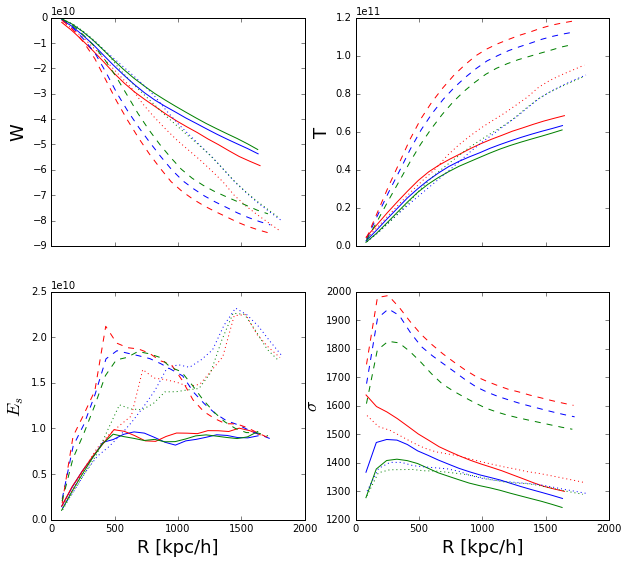

In [30]:
f3,((ax1, ax2), (ax3, ax4))=subplots(2, 2,sharex='all')
f3.set(figwidth=10,figheight=9)
for i in range(3):
    if i == 0:
        dm_ds=dm_d0; cs_ds=cs_d0; ag_ds=ag_d0
        lss='-'
    elif i == 1:
        dm_ds=dm_d1; cs_ds=cs_d1; ag_ds=ag_d1
        lss=':'
    elif i == 2:
        dm_ds=dm_d9; cs_ds=cs_d9; ag_ds=ag_d9
        lss='--'
    ax1.plot(dm_ds[:,1],dm_ds[:,3],'b',ls=lss,label="DM") #POT
    ax1.plot(cs_ds[:,1],cs_ds[:,4],'r',ls=lss,label="CSF")
    ax1.plot(ag_ds[:,1],ag_ds[:,4],'g',ls=lss,label="AGN")
    ax2.plot(dm_ds[:,1],dm_ds[:,2],'b',ls=lss,label="DM") #KIT
    ax2.plot(cs_ds[:,1],cs_ds[:,2],'r',ls=lss,label="CSF")
    ax2.plot(ag_ds[:,1],ag_ds[:,2],'g',ls=lss,label="AGN")
    ax3.plot(dm_ds[:,1],dm_ds[:,4],'b',ls=lss,label="DM") #SP
    ax3.plot(cs_ds[:,1],cs_ds[:,5],'r',ls=lss,label="CSF")
    ax3.plot(ag_ds[:,1],ag_ds[:,5],'g',ls=lss,label="AGN")
    ax4.plot(dm_ds[:,1],dm_ds[:,-1],'b',ls=lss,label="DM") #sigma
    ax4.plot(cs_ds[:,1],cs_ds[:,-1],'r',ls=lss,label="CSF")
    ax4.plot(ag_ds[:,1],ag_ds[:,-1],'g',ls=lss,label="AGN")
ax1.set_ylabel("W",fontsize=18)
#ax1.legend(loc=3,fontsize=12)
ax2.set_ylabel("T",fontsize=18)
ax3.set_ylabel(r"$E_s$",fontsize=18)
ax3.set_xlabel("R [kpc/h]",fontsize=18)
ax4.set_ylabel(r"$\sigma$",fontsize=18)
ax4.set_xlabel("R [kpc/h]",fontsize=18)

### ratial changes for the selection criteria with only DM component

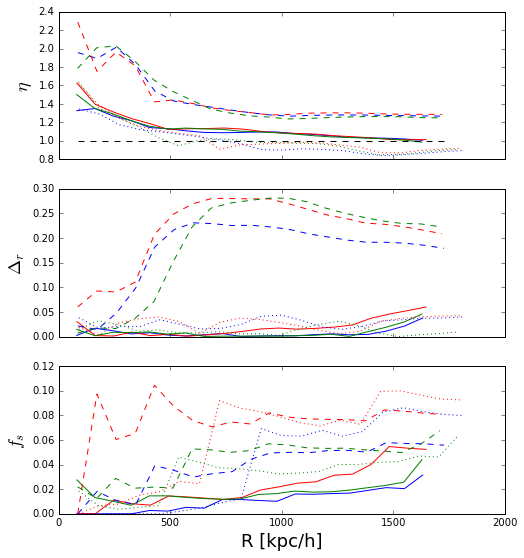

In [25]:
f5,(ax1, ax2, ax3)=subplots(3, 1,sharex='all')
f5.set(figwidth=8,figheight=9)
for i in range(3):
    if i == 0:
        dm_ds=dm_d0; cs_ds=cs_d0; ag_ds=ag_d0
        lss='-'
    elif i == 1:
        dm_ds=dm_d1; cs_ds=cs_d1; ag_ds=ag_d1
        lss=':'
    elif i == 2:
        dm_ds=dm_d9; cs_ds=cs_d9; ag_ds=ag_d9
        lss='--'
    ax1.plot(dm_ds[:,1],(dm_ds[:,2]-dm_ds[:,4])/-dm_ds[:,3],'b',ls=lss,label="DM") #\eta
    ax1.plot(cs_ds[:,1],(cs_ds[:,2]+cs_ds[:,3]-cs_ds[:,5]-cs_ds[:,6])/-cs_ds[:,4],'r',ls=lss,label="CSF")
    ax1.plot(ag_ds[:,1],(ag_ds[:,2]+ag_ds[:,3]-ag_ds[:,5]-ag_ds[:,6])/-ag_ds[:,4],'g',ls=lss,label="AGN")
    ax2.plot(dm_ds[:,1],dm_ds[:,-3]/dm_ds[:,1],'b',ls=lss,label="DM") #\Delta_r
    ax2.plot(cs_ds[:,1],cs_ds[:,-3]/cs_ds[:,1],'r',ls=lss,label="CSF")
    ax2.plot(ag_ds[:,1],ag_ds[:,-3]/ag_ds[:,1],'g',ls=lss,label="AGN")
    ax3.plot(dm_ds[:,1],dm_ds[:,-2],'b',ls=lss,label="DM") #fs
    ax3.plot(cs_ds[:,1],cs_ds[:,-2],'r',ls=lss,label="CSF")
    ax3.plot(ag_ds[:,1],ag_ds[:,-2],'g',ls=lss,label="AGN")
ax1.plot([dm_ds[0,1], dm_ds[-1,1]], [1,1], 'k--')
ax1.set_ylabel(r"$\eta$",fontsize=18)
ax2.set_ylabel(r"$\Delta_r$",fontsize=18)
#ax2.legend(loc=2,fontsize=12)
ax3.set_ylabel(r"$f_s$",fontsize=18)
ax3.set_xlabel("R [kpc/h]",fontsize=18)

###### ratial difference between the tatal materials and DM component

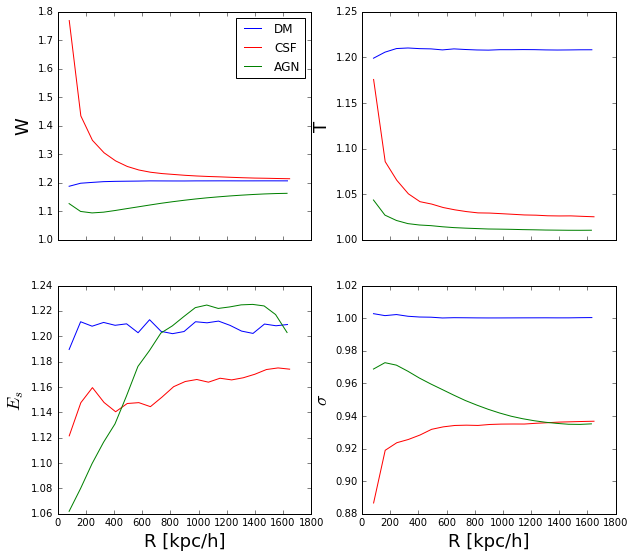

In [9]:
f6,((ax1, ax2), (ax3, ax4))=subplots(2, 2,sharex='all')
f6.set(figwidth=10,figheight=9)
ax1.plot(dm_ds[:,1],dm_s[:,3]/dm_ds[:,3],'b-',label="DM") #POT
ax1.plot(cs_ds[:,1],cs_s[:,4]/cs_ds[:,4],'r-',label="CSF")
ax1.plot(ag_ds[:,1],ag_s[:,4]/ag_ds[:,4],'g-',label="AGN")
ax2.plot(dm_ds[:,1],dm_s[:,2]/dm_ds[:,2],'b-',label="DM") #KIT
ax2.plot(cs_ds[:,1],cs_s[:,2]/cs_ds[:,2],'r-',label="CSF")
ax2.plot(ag_ds[:,1],ag_s[:,2]/ag_ds[:,2],'g-',label="AGN")
ax3.plot(dm_ds[:,1],dm_s[:,4]/dm_ds[:,4],'b-',label="DM") #SP
ax3.plot(cs_ds[:,1],(cs_s[:,5]+cs_s[:,6])/cs_ds[:,5],'r-',label="CSF")
ax3.plot(ag_ds[:,1],(ag_s[:,5]+ag_s[:,6])/ag_ds[:,5],'g-',label="AGN")
ax4.plot(dm_ds[:,1],dm_s[:,-1]/dm_ds[:,-1],'b-',label="DM") #sigma
ax4.plot(cs_ds[:,1],cs_s[:,-1]/cs_ds[:,-1],'r-',label="CSF")
ax4.plot(ag_ds[:,1],ag_s[:,-1]/ag_ds[:,-1],'g-',label="AGN")
ax1.set_ylabel("W",fontsize=18)
ax1.legend(loc=1,fontsize=12)
ax2.set_ylabel("T",fontsize=18)
ax3.set_ylabel(r"$E_s$",fontsize=18)
ax3.set_xlabel("R [kpc/h]",fontsize=18)
ax4.set_ylabel(r"$\sigma$",fontsize=18)
ax4.set_xlabel("R [kpc/h]",fontsize=18)

In [20]:
#For DM part only! B effects on the DM 
dm_ds=np.loadtxt(path+"RDM/data/KP_sin-dm-0.txt")
cs_ds=np.load(path+"CSF/data/KP_sin-sep-0.npy")
ag_ds=np.load(path+"AGN/data/KP_sin-sep-0.npy")

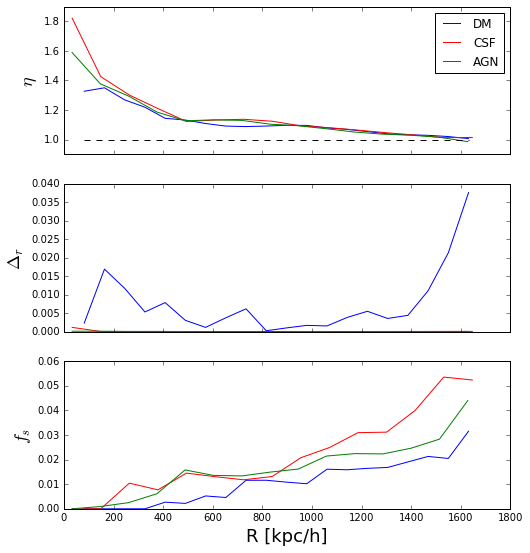

In [22]:
f5,(ax1, ax2, ax3)=subplots(3, 1,sharex='all')
f5.set(figwidth=8,figheight=9)
ax1.plot(dm_ds[:,1],(dm_ds[:,2]-dm_ds[:,4])/-dm_ds[:,3],'b-',label="DM") #\eta
ax1.plot(cs_ds[:,0],(cs_ds[:,11]-cs_ds[:,19])/-cs_ds[:,15],'r-',label="CSF")
ax1.plot(ag_ds[:,0],(ag_ds[:,11]-ag_ds[:,19])/-ag_ds[:,15],'g-',label="AGN")
ax2.plot(dm_ds[:,1],dm_ds[:,-3]/dm_ds[:,1],'b-',label="DM") #\Delta_r
ax2.plot(cs_ds[:,0],cs_ds[:,3]/cs_ds[:,0],'r-',label="CSF")
ax2.plot(ag_ds[:,0],ag_ds[:,3]/ag_ds[:,0],'g-',label="AGN")
ax3.plot(dm_ds[:,1],dm_ds[:,-2],'b-',label="DM") #fs
ax3.plot(cs_ds[:,0],cs_ds[:,23]/cs_ds[:,6],'r-',label="CSF")
ax3.plot(ag_ds[:,0],ag_ds[:,23]/ag_ds[:,6],'g-',label="AGN")
ax1.plot([dm_ds[0,1], dm_ds[-1,1]], [1,1], 'k--')
ax1.set_ylabel(r"$\eta$",fontsize=18)
ax2.set_ylabel(r"$\Delta_r$",fontsize=18)
ax1.legend(loc=1,fontsize=12)
ax3.set_ylabel(r"$f_s$",fontsize=18)
ax3.set_xlabel("R [kpc/h]",fontsize=18)